In [1]:
import math  
import pandas  
import numpy  
List = ["Narasimha","Naresh","Pandu"] 
sub_l=["piller"] 

List.append(sub_l) 
# Insert 
List_1 = List.insert(3,"Pavan")  
List.extend(List)  
print(List)  
store = []
for i in range(15) :
    store.append = i **2


['Narasimha', 'Naresh', 'Pandu', 'Pavan', ['piller'], 'Narasimha', 'Naresh', 'Pandu', 'Pavan', ['piller']]


AttributeError: 'list' object attribute 'append' is read-only

In [ ]:
import argparse
def main(number, other_number):
result = number * other_number
print(f'The result is {result}')

if __name__ == '__main__':
parser = argparse.ArgumentParser()
parser.add_argument('-n1', type=int, help='A number', default=1)
parser.add_argument('-n2', type=int, help='Another number', default=1)

args = parser.parse_args()

main(args.n1, args.n2)

In [18]:
import argparse


def main(number):
    print('#' * number)


if __name__ == '__main__':

    parser = argparse.ArgumentParser()
    parser.add_argument('number', type=int, help='A number')

    args = parser.parse_args()

    main(args.number)

usage: ipykernel_launcher.py [-h] number
ipykernel_launcher.py: error: argument number: invalid int value: 'C:\\Users\\dell\\AppData\\Roaming\\jupyter\\runtime\\kernel-860d2ad1-aa62-43fb-9497-7f43b6209630.json'


SystemExit: 2

In [1]:
from google.cloud import bigquery


In [2]:
def query_to_bigquery(query):
    client = bigquery.Client()
    query_job = client.query(query)
    result = query_job.result()
    dataframe = result.to_dataframe()
    return dataframe

In [3]:
import matplotlib.pyplot as plt


In [4]:
# GOOGLE_APPLICATION_CREDENTIALS='C:\\Users\\dell\\Downloads\\My Project-c6320a5c7299.json'
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="C:\\Users\\dell\\Downloads\\My Project-c6320a5c7299.json"

In [5]:
def visualize_bar_chart(x, x_label, y, y_label, title):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    index = np.arange(len(x))
    plt.xticks(index, x, fontsize=5, rotation=30)
    plt.bar(index, y)
    return plt

In [6]:
query = """ 
        SELECT DATE(creation_date) date, COUNT(*) total_posts
        FROM `bigquery-public-data.stackoverflow.post_history`
        GROUP BY 1
        HAVING date > DATE_SUB('2018-12-02', INTERVAL 14 DAY)
        ORDER BY 1
        """

In [7]:
dataframe = query_to_bigquery(query)

In [8]:
dataframe.head()

,date,total_posts
0,2018-11-19,41095
1,2018-11-20,44303
2,2018-11-21,44154
3,2018-11-22,40229
4,2018-11-23,34889


In [9]:
x = dataframe['date'].tolist()
y = dataframe['total_posts'].tolist()

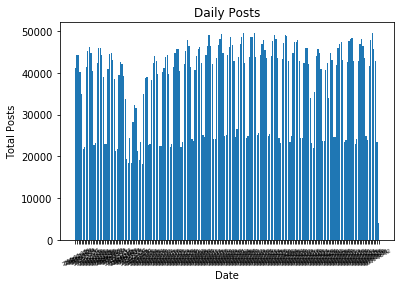

In [10]:
import numpy as np
plt = visualize_bar_chart(x=x, x_label='Date', y=y, y_label='Total Posts', title='Daily Posts')
plt.savefig('viz.png')

In [11]:
def get_and_save_image():
    query = """ 
            SELECT DATE(creation_date) date, COUNT(*) total_posts
            FROM `bigquery-public-data.stackoverflow.post_history`
            GROUP BY 1
            HAVING date > DATE_SUB('2018-12-02', INTERVAL 14 DAY)
            ORDER BY 1
            """
    dataframe = query_to_bigquery(query)   
    x = dataframe['date'].tolist()
    y = dataframe['total_posts'].tolist()
    plt = visualize_bar_chart(x=x, x_label='Date', y=y, y_label='Total Posts', title='Daily Posts')
    plt.savefig('viz.png')

In [12]:
def send_image(bot, update):
    get_and_save_image()
    chat_id = 'CHAT_ID_RECEIVER'
    bot.send_photo(chat_id=chat_id, photo=open('viz.png','rb'))

In [13]:
from telegram.ext import Updater
import datetime


In [ ]:
def main():
    updater = Updater('875811751:AAFR002ygvBFd-Vl3FFW9w1WuXCdJDBdlr4')
    updater.job_queue.run_daily(send_image, time=datetime.datetime.strptime('9:00AM', '%I:%M%p').time(), days=(0,1,2,3,4,5,6))
    updater.start_polling()
    updater.idle()
if __name__ == '__main__':
    main()

In [ ]:
print(GOOGLE_APPLICATION_CREDENTIALS)